In [1]:


# imports
%matplotlib inline
# %pylab osx
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
# Some additional libraries which we'll use just
# to produce some visualizations of our training
from libs.utils import montage
from libs import gif
import IPython.display as ipyd
plt.style.use('ggplot')


/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [3]:
pip install scipy==1.1.0

     |████████████████████████████████| 31.2MB 904kB/s eta 0:00:01
  Found existing installation: scipy 1.3.1
    Uninstalling scipy-1.3.1:
      Successfully uninstalled scipy-1.3.1
Note: you may need to restart the kernel to use updated packages.


In [2]:
from IPython.core.display import HTML
HTML("""<style> .rendered_html code { 
    padding: 2px 4px;
    color: #c7254e;
    background-color: #f9f2f4;
    border-radius: 4px;
} </style>""")


In [3]:
from libs.datasets import MNIST
ds = MNIST()

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [4]:
print(ds.X.shape)

(70000, 784)


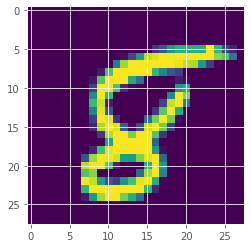

In [5]:
plt.imshow(ds.X[0].reshape((28,28)))

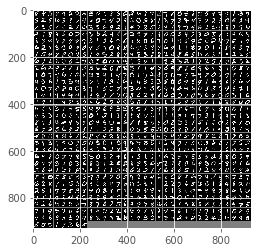

In [6]:
imgs = ds.X[:1000].reshape((-1, 28, 28))
plt.imshow(montage(imgs), cmap='gray')

In [7]:
mean_img = np.mean(ds.X, axis=0)

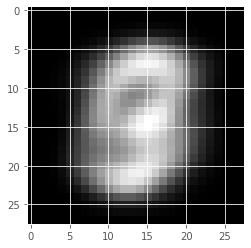

In [8]:
plt.figure()
plt.imshow(mean_img.reshape((28, 28)), cmap='gray')

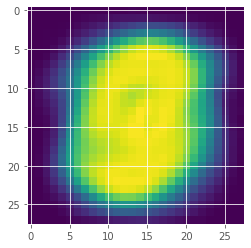

In [9]:
std_img = np.std(ds.X, axis=0)

plt.figure()
plt.imshow(std_img.reshape((28,28)))

In [10]:
dimensions = [512, 256, 128, 64]

In [11]:
n_features = ds.X.shape[1]

X = tf.placeholder(tf.float32, [None, n_features])

In [13]:
current_input = X
n_input = n_features

Ws = []

for layer_i, n_output in enumerate(dimensions):
    with tf.variable_scope("encoder/layer/{}".format(layer_i)):
        W = tf.get_variable(
            name='W',
            shape=[n_input, n_output],
            initializer=tf.random_normal_initializer(mean=0.0, stddev=0.02))
        
        h = tf.matmul(current_input, W)
        
        current_input = tf.nn.relu(h)
        
        Ws.append(W)
        
        n_input = n_output

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
print(current_input.get_shape())

(?, 64)


In [17]:


dimensions = dimensions[::-1][1:] + [ds.X.shape[1]]
print(dimensions)

[128, 256, 512, 784]


In [20]:
Ws = Ws[::-1]

In [21]:
for layer_i, n_output in enumerate(dimensions):
    with tf.variable_scope('decoder/layer/{}'.format(layer_i)):
        W= tf.transpose(Ws[layer_i])
        
        h = tf.matmul(current_input, W)
        
        current_input = tf.nn.relu(h)
        
        n_input = n_output

In [22]:
Y = current_input

In [23]:
cost = tf.reduce_mean(tf.squared_difference(X, Y), 1)
print(cost.get_shape())

(?,)


In [24]:
cost = tf.reduce_mean(cost)

In [25]:
learning_rate = 0.001
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Use tf.cast instead.


In [26]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

0 0.041553978
1 0.037306666
2 0.034778666
3 0.03178011


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


4 0.032443758


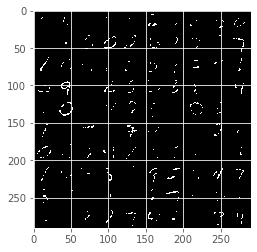

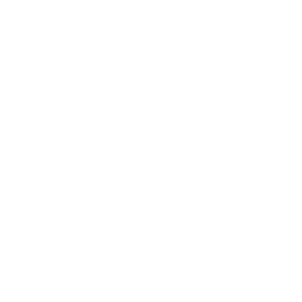

In [29]:
batch_size = 100
n_epochs = 5

examples = ds.X[:100]

imgs = []
fig, ax = plt.subplots(1,1)
for epoch_i in range(n_epochs):
    for batch_X, _ in ds.train.next_batch():
        sess.run(optimizer, feed_dict={X: batch_X - mean_img})
    recon = sess.run(Y, feed_dict={X: examples - mean_img})
    recon = np.clip((recon + mean_img).reshape((-1, 28, 28)), 0, 255)
    img_i = montage(recon).astype(np.uint8)
    imgs.append(img_i)
    ax.imshow(img_i, cmap='gray')
    fig.canvas.draw()
    print(epoch_i, sess.run(cost, feed_dict={X: batch_X - mean_img}))
gif.build_gif(imgs, saveto='ae.gif', cmap='gray')

In [31]:
ipyd.Image(url='ae.gif?{}'.format(np.random.rand()),
height=500, width=500)

In [54]:
from tensorflow.python.framework.ops import reset_default_graph
reset_default_graph()

In [55]:
X = tf.placeholder(tf.float32, [None, n_features])

In [56]:
X_tensor = tf.reshape(X, [-1, 28, 28, 1])

In [57]:
n_filters = [16, 16, 16]
filter_sizes = [4, 4, 4]

In [58]:
current_input = X_tensor

n_input = 1

Ws = []
shapes = []

for layer_i, n_output in enumerate(n_filters):
    with tf.variable_scope("encoder/layer/{}".format(layer_i)):
        shapes.append(current_input.get_shape().as_list())
        
        W = tf.get_variable(
            name='W',
            shape=[
                filter_sizes[layer_i],
                filter_sizes[layer_i],
                n_input,
                n_output],
            initializer=tf.random_normal_initializer(mean=0.0, stddev=0.02))
        
        h = tf.nn.conv2d(current_input, W, 
                        strides=[1,2,2,1], padding='SAME')
        current_input = tf.nn.relu(h)
        
        Ws.append(W)
        
        n_input = n_output

In [59]:
Ws.reverse()
shapes.reverse()
n_filters.reverse()
n_filters = n_filters[1:] + [1]

print(n_filters, filter_sizes, shapes)

[16, 16, 1] [4, 4, 4] [[None, 7, 7, 16], [None, 14, 14, 16], [None, 28, 28, 1]]


In [60]:
for layer_i, shape in enumerate(shapes):
    with tf.variable_scope('decoder/layer/{}'.format(layer_i)):
        W = Ws[layer_i]
        
        h = tf.nn.conv2d_transpose(current_input, W,
                    tf.stack([tf.shape(X)[0], shape[1], shape[2], shape[3]]),
                    strides=[1,2,2,1], padding='SAME')
        current_input = tf.nn.relu(h)

In [61]:
Y = current_input
Y = tf.reshape(Y, [-1, n_features])

0 0.025886366
1 0.024899364
2 0.025272844
3 0.025242215


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


4 0.024684086


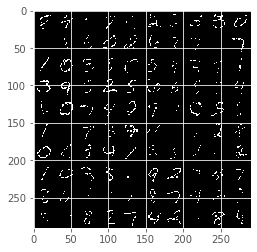

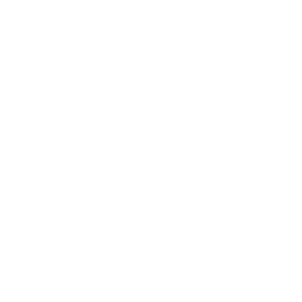

In [62]:
cost = tf.reduce_mean(tf.reduce_mean(tf.squared_difference(X, Y), 1))
learning_rate = 0.001

# pass learning rate and cost to optimize
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

# Session to manage vars/train
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# Some parameters for training
batch_size = 100
n_epochs = 5

# We'll try to reconstruct the same first 100 images and show how
# The network does over the course of training.
examples = ds.X[:100]

# We'll store the reconstructions in a list
imgs = []
fig, ax = plt.subplots(1, 1)
for epoch_i in range(n_epochs):
    for batch_X, _ in ds.train.next_batch():
        sess.run(optimizer, feed_dict={X: batch_X - mean_img})
    recon = sess.run(Y, feed_dict={X: examples - mean_img})
    recon = np.clip((recon + mean_img).reshape((-1, 28, 28)), 0, 255)
    img_i = montage(recon).astype(np.uint8)
    imgs.append(img_i)
    ax.imshow(img_i, cmap='gray')
    fig.canvas.draw()
    print(epoch_i, sess.run(cost, feed_dict={X: batch_X - mean_img}))
gif.build_gif(imgs, saveto='conv-ae.gif', cmap='gray')

In [64]:
ipyd.Image(url='conv-ae.gif?{}'.format(np.random.rand()), height=500,width=500)

In [65]:
from libs import datasets


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
3


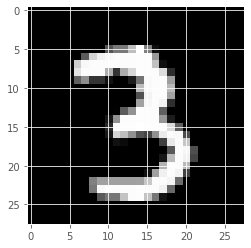

In [66]:
ds = datasets.MNIST(one_hot=False)
print(ds.Y[0])
plt.imshow(np.reshape(ds.X[0], (28,28)), cmap='gray')

1


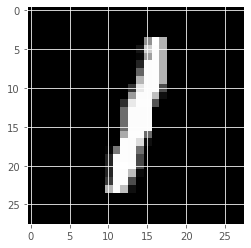

In [68]:
plt.figure()
print(ds.Y[1])
plt.imshow(np.reshape(ds.X[1], (28,28)), cmap='gray')

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


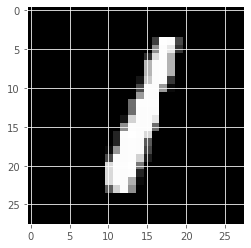

In [69]:
ds = datasets.MNIST(one_hot=True)
plt.figure()
plt.imshow(np.reshape(ds.X[0], (28,28)), cmap='gray')
print(ds.Y[0])
plt.imshow(np.reshape(ds.X[1], (28,28)), cmap='gray')
print(ds.Y[1])

In [70]:
print(ds.X.shape)

(70000, 784)


In [71]:
print(ds.Y.shape)
print(ds.Y[0])

(70000, 10)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
